In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# error ignore
import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
# df_product = pd.read_csv('product.csv', on_bad_lines='skip')
# df_customer = pd.read_csv('customer.csv')
# df_click = pd.read_csv('click_stream_new.csv')
# df_transaction = pd.read_csv('transaction_new.csv')


df_transaction = pd.read_csv('transaction_new.csv', on_bad_lines='skip')

df_transaction.head(20)

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.23,111.97,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.01,107.80,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.58,115.74,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.60,120.36,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.60,120.36,198753,55220,1,198753
5,2019-02-03T11:25:55.365620Z,4774,1ed58c46-67fb-4386-924b-983c74ccb4d7,7fa0b583-6d30-40bc-8b61-0f70f5bef30f,Debit Card,Success,6369,WEEKENDMANTAP,5000,2019-02-07T10:41:59.997463Z,-3.60,120.36,181865,59620,1,183234
6,2019-03-22T11:53:02.365620Z,4774,c0ced313-e6b1-4a2a-b21f-347eccda5f96,e140f1f1-6da1-42b3-b2d1-56ac6fc72d4a,Credit Card,Success,0,NaN,10000,2019-03-27T14:40:13.181562Z,-7.71,110.50,306599,53136,1,296599
7,2019-05-08T11:29:21.365620Z,4774,0ed6730f-a5db-4e40-9a54-c343474d872c,e7eff973-b499-4b8d-9892-89e67e5fd7d4,Credit Card,Success,0,NaN,10000,2019-05-10T20:09:58.104955Z,3.29,98.86,153913,14142,1,143913
8,2019-06-24T12:08:52.365620Z,4774,6edd9366-4788-4bbb-ae5b-744e45e6118d,0d20c278-e082-4f28-9afe-8b5907d7a284,Credit Card,Success,4019,AZ2022,10000,2019-06-28T10:34:36.588498Z,-6.13,106.78,370757,12282,1,364776
9,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,-0.99,114.44,1295740,53051,1,292052


In [12]:
# Assuming your DataFrame is named 'df' and you have 'discount price' and 'item price' columns
df_transaction['discount_rate'] = ( df_transaction['promo_amount'] / df_transaction['item_price']) * 100


# promotion discount

In [13]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   created_at              1254585 non-null  object 
 1   customer_id             1254585 non-null  int64  
 2   booking_id              1254585 non-null  object 
 3   session_id              1254585 non-null  object 
 4   payment_method          1254585 non-null  object 
 5   payment_status          1254585 non-null  object 
 6   promo_amount            1254585 non-null  int64  
 7   promo_code              481139 non-null   object 
 8   shipment_fee            1254585 non-null  int64  
 9   shipment_date_limit     1254585 non-null  object 
 10  shipment_location_lat   1254585 non-null  float64
 11  shipment_location_long  1254585 non-null  float64
 12  total_amount            1254585 non-null  int64  
 13  product_id              1254585 non-null  int64  
 14  qu

In [14]:
df_discount = df_transaction.loc[:,['promo_code','promo_amount', 'shipment_fee','total_amount', 'quantity', 'item_price']].copy()
df_discount.head(20)

,promo_code,promo_amount,shipment_fee,total_amount,quantity,item_price
0,WEEKENDSERU,1415,10000,199832,1,191247
1,NaN,0,10000,155526,1,145526
2,NaN,0,10000,550696,4,135174
3,NaN,0,0,271012,1,271012
4,NaN,0,0,198753,1,198753
5,WEEKENDMANTAP,6369,5000,181865,1,183234
6,NaN,0,10000,306599,1,296599
7,NaN,0,10000,153913,1,143913
8,AZ2022,4019,10000,370757,1,364776
9,WEEKENDSERU,9072,10000,1295740,1,292052


### Nan value chcek

In [15]:
# promo_code Nan check
df_discount['promo_code'] = df_discount['promo_code'].replace('NaN', np.nan)

df_discount_Nan = df_discount[df_discount['promo_code'].isna()]
df_discount_Nan.head(20)

,promo_code,promo_amount,shipment_fee,total_amount,quantity,item_price
1,NaN,0,10000,155526,1,145526
2,NaN,0,10000,550696,4,135174
3,NaN,0,0,271012,1,271012
4,NaN,0,0,198753,1,198753
6,NaN,0,10000,306599,1,296599
7,NaN,0,10000,153913,1,143913
15,NaN,0,10000,1895458,6,314243
16,NaN,0,10000,253391,1,243391
18,NaN,0,10000,2108413,1,367216
19,NaN,0,10000,2108413,2,150796


In [16]:
df_discount_Nan['value_check'] = df_discount_Nan['total_amount'] - (df_discount_Nan['item_price'] * df_discount_Nan['quantity']) - df_discount_Nan['shipment_fee']
df_discount_Nan.tail(10)

,promo_code,promo_amount,shipment_fee,total_amount,quantity,item_price,value_check
1254564,NaN,0,10000,110861,1,100861,0
1254567,NaN,0,0,240318,1,240318,0
1254568,NaN,0,50000,209548,1,159548,0
1254569,NaN,0,10000,186537,1,176537,0
1254574,NaN,0,0,237077,1,237077,0
1254576,NaN,0,5000,531721,1,362206,164515
1254577,NaN,0,5000,531721,1,164515,362206
1254578,NaN,0,0,114354,1,114354,0
1254579,NaN,0,10000,287688,1,277688,0
1254580,NaN,0,0,226820,2,113410,0


In [17]:
# 값이 틀린값이 들어가있음
df_discount_Nan['value_check'].sum()

626081962656

### promo value check

In [18]:
df_discount_promo = df_discount.dropna()
df_discount_promo.head(10)

,promo_code,promo_amount,shipment_fee,total_amount,quantity,item_price
0,WEEKENDSERU,1415,10000,199832,1,191247
5,WEEKENDMANTAP,6369,5000,181865,1,183234
8,AZ2022,4019,10000,370757,1,364776
9,WEEKENDSERU,9072,10000,1295740,1,292052
10,WEEKENDSERU,9072,10000,1295740,1,241945
11,WEEKENDSERU,9072,10000,1295740,1,297248
12,WEEKENDSERU,9072,10000,1295740,1,191138
13,WEEKENDSERU,9072,10000,1295740,1,78559
14,WEEKENDSERU,9072,10000,1295740,1,193870
17,LIBURDONG,6208,10000,249616,1,245824


In [19]:
df_discount_promo['value_check'] = df_discount_promo['total_amount'] - (df_discount_promo['item_price'] * df_discount_promo['quantity']) - df_discount_promo['shipment_fee'] + df_discount_promo['promo_amount']
df_discount_promo.tail(10)

,promo_code,promo_amount,shipment_fee,total_amount,quantity,item_price,value_check
1254566,STARTUP,10327,0,1889564,5,331316,243311
1254570,AZ2022,5060,10000,232845,1,227905,0
1254571,XX2022,2603,25000,340924,1,318527,0
1254572,BUYMORE,4890,15000,246186,1,236076,0
1254573,BUYMORE,5177,0,387326,1,392503,0
1254575,XX2022,3388,0,485334,1,488722,0
1254581,AZ2022,5010,10000,359203,1,354213,0
1254582,WEEKENDSERU,2181,5000,1158159,4,288835,0
1254583,AZ2022,4503,0,184143,1,188646,0
1254584,BUYMORE,4724,10000,365963,1,360687,0


In [20]:
# promotion code 값도 틀린 값이 많음
df_discount_promo['value_check'].sum()

384583924776

### wrong value check and EDA

In [21]:
df_discount['value_check'] = df_discount['total_amount'] - (df_discount['item_price'] * df_discount['quantity']) - df_discount['shipment_fee'] + df_discount['promo_amount']

df_discount_wrong = df_discount[df_discount['value_check'] != 0]
df_discount_wrong.head(20)

,promo_code,promo_amount,shipment_fee,total_amount,quantity,item_price,value_check
9,WEEKENDSERU,9072,10000,1295740,1,292052,1002760
10,WEEKENDSERU,9072,10000,1295740,1,241945,1052867
11,WEEKENDSERU,9072,10000,1295740,1,297248,997564
12,WEEKENDSERU,9072,10000,1295740,1,191138,1103674
13,WEEKENDSERU,9072,10000,1295740,1,78559,1216253
14,WEEKENDSERU,9072,10000,1295740,1,193870,1100942
18,NaN,0,10000,2108413,1,367216,1731197
19,NaN,0,10000,2108413,2,150796,1796821
20,NaN,0,10000,2108413,8,157414,839101
21,NaN,0,10000,2108413,1,170293,1928120


In [22]:
# 120만개 데이터 중 54만개 데이터 값이 이상?
len(df_discount_wrong)

547917

In [23]:
df_discount['true_quantity'] = (df_discount['total_amount'] - df_discount['shipment_fee'] + df_discount['promo_amount']) / df_discount['item_price']
df_discount.head(20)

,promo_code,promo_amount,shipment_fee,total_amount,quantity,item_price,value_check,true_quantity
0,WEEKENDSERU,1415,10000,199832,1,191247,0,1.00
1,NaN,0,10000,155526,1,145526,0,1.00
2,NaN,0,10000,550696,4,135174,0,4.00
3,NaN,0,0,271012,1,271012,0,1.00
4,NaN,0,0,198753,1,198753,0,1.00
5,WEEKENDMANTAP,6369,5000,181865,1,183234,0,1.00
6,NaN,0,10000,306599,1,296599,0,1.00
7,NaN,0,10000,153913,1,143913,0,1.00
8,AZ2022,4019,10000,370757,1,364776,0,1.00
9,WEEKENDSERU,9072,10000,1295740,1,292052,1002760,4.43


### product_id & item_price check

In [24]:
df_product_price = df_transaction.loc[:,['promo_code','promo_amount', 'shipment_fee','total_amount', 'quantity', 'item_price', 'product_id']].copy()
df_product_price.head(20)

,promo_code,promo_amount,shipment_fee,total_amount,quantity,item_price,product_id
0,WEEKENDSERU,1415,10000,199832,1,191247,54728
1,NaN,0,10000,155526,1,145526,16193
2,NaN,0,10000,550696,4,135174,53686
3,NaN,0,0,271012,1,271012,20228
4,NaN,0,0,198753,1,198753,55220
5,WEEKENDMANTAP,6369,5000,181865,1,183234,59620
6,NaN,0,10000,306599,1,296599,53136
7,NaN,0,10000,153913,1,143913,14142
8,AZ2022,4019,10000,370757,1,364776,12282
9,WEEKENDSERU,9072,10000,1295740,1,292052,53051


In [25]:
# product id가 같아도 가격은 같지 않음
df_product_price[df_product_price['product_id'] == 54728]

,promo_code,promo_amount,shipment_fee,total_amount,quantity,item_price,product_id
0,WEEKENDSERU,1415,10000,199832,1,191247,54728
49134,NaN,0,10000,232512,1,222512,54728
55958,NaN,0,10000,255159,1,245159,54728
72180,NaN,0,0,263371,1,263371,54728
123972,NaN,0,10000,2413496,8,300437,54728
272775,AZ2022,3068,10000,1592316,2,334129,54728
304917,NaN,0,10000,1864265,1,133392,54728
383164,NaN,0,0,752418,1,269036,54728
397238,AZ2022,4310,10000,70368,1,64678,54728
464611,NaN,0,0,653810,1,234206,54728


In [26]:
# 정상적인 item_price를 찾을 방법이 없기에 value check 값이 0이 아닌 데이터 제외
df_discount_true = df_discount[df_discount['value_check'] == 0]
df_discount_true.head(20)

,promo_code,promo_amount,shipment_fee,total_amount,quantity,item_price,value_check,true_quantity
0,WEEKENDSERU,1415,10000,199832,1,191247,0,1.00
1,NaN,0,10000,155526,1,145526,0,1.00
2,NaN,0,10000,550696,4,135174,0,4.00
3,NaN,0,0,271012,1,271012,0,1.00
4,NaN,0,0,198753,1,198753,0,1.00
5,WEEKENDMANTAP,6369,5000,181865,1,183234,0,1.00
6,NaN,0,10000,306599,1,296599,0,1.00
7,NaN,0,10000,153913,1,143913,0,1.00
8,AZ2022,4019,10000,370757,1,364776,0,1.00
15,NaN,0,10000,1895458,6,314243,0,6.00


In [27]:
df_discount_true.value_check.sum()

0

### promo code visualization

In [28]:
df_discount_true['promo_code'].unique()

array(['WEEKENDSERU', nan, 'WEEKENDMANTAP', 'AZ2022', 'LIBURDONG',
       'BUYMORE', 'XX2022', 'STARTUP', 'SC2022'], dtype=object)

In [29]:
df_discount_true['discount_rate'] = ( df_discount_true['promo_amount'] / df_discount_true['total_amount']) * 100
df_discount_true.head(10)

,promo_code,promo_amount,shipment_fee,total_amount,quantity,item_price,value_check,true_quantity,discount_rate
0,WEEKENDSERU,1415,10000,199832,1,191247,0,1.00,0.71
1,NaN,0,10000,155526,1,145526,0,1.00,0.00
2,NaN,0,10000,550696,4,135174,0,4.00,0.00
3,NaN,0,0,271012,1,271012,0,1.00,0.00
4,NaN,0,0,198753,1,198753,0,1.00,0.00
5,WEEKENDMANTAP,6369,5000,181865,1,183234,0,1.00,3.50
6,NaN,0,10000,306599,1,296599,0,1.00,0.00
7,NaN,0,10000,153913,1,143913,0,1.00,0.00
8,AZ2022,4019,10000,370757,1,364776,0,1.00,1.08
15,NaN,0,10000,1895458,6,314243,0,6.00,0.00


In [30]:
# AZ2022 plot test

df_AZ2022 = df_discount_true[df_discount_true['promo_code'] == 'AZ2022']
df_AZ2022.head(20)
# df_AZ2022.describe()

,promo_code,promo_amount,shipment_fee,total_amount,quantity,item_price,value_check,true_quantity,discount_rate
8,AZ2022,4019,10000,370757,1,364776,0,1.00,1.08
35,AZ2022,6325,10000,75865,1,72190,0,1.00,8.34
39,AZ2022,3830,10000,488031,1,481861,0,1.00,0.78
41,AZ2022,7255,10000,311231,1,308486,0,1.00,2.33
49,AZ2022,5851,10000,483582,1,479433,0,1.00,1.21
94,AZ2022,3855,10000,272755,1,266610,0,1.00,1.41
100,AZ2022,6418,10000,210267,1,206685,0,1.00,3.05
108,AZ2022,6619,10000,79686,1,76305,0,1.00,8.31
135,AZ2022,9346,10000,377246,1,376592,0,1.00,2.48
136,AZ2022,2612,10000,624096,1,616708,0,1.00,0.42


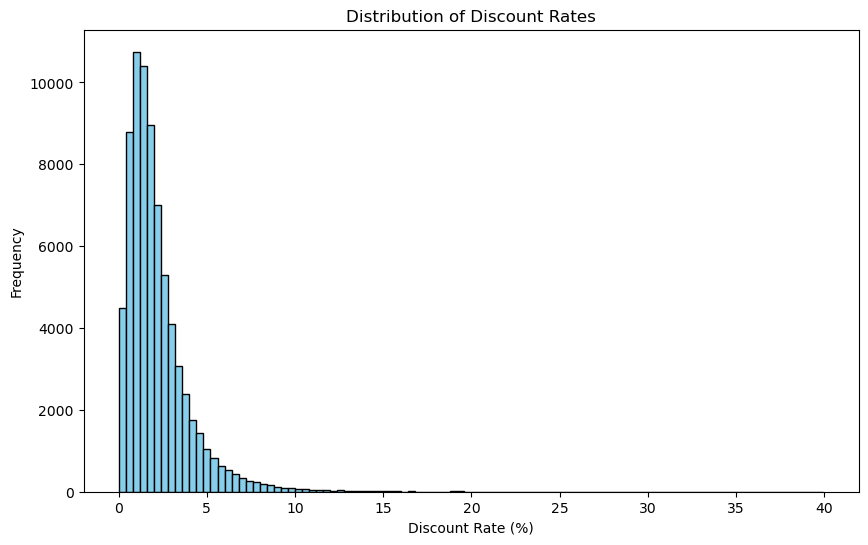

In [31]:
df_AZ2022 = df_discount_true[df_discount_true['promo_code'] == 'AZ2022']

plt.figure(figsize=(10, 6))
plt.hist(df_AZ2022['discount_rate'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Discount Rate (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Discount Rates')
plt.show()

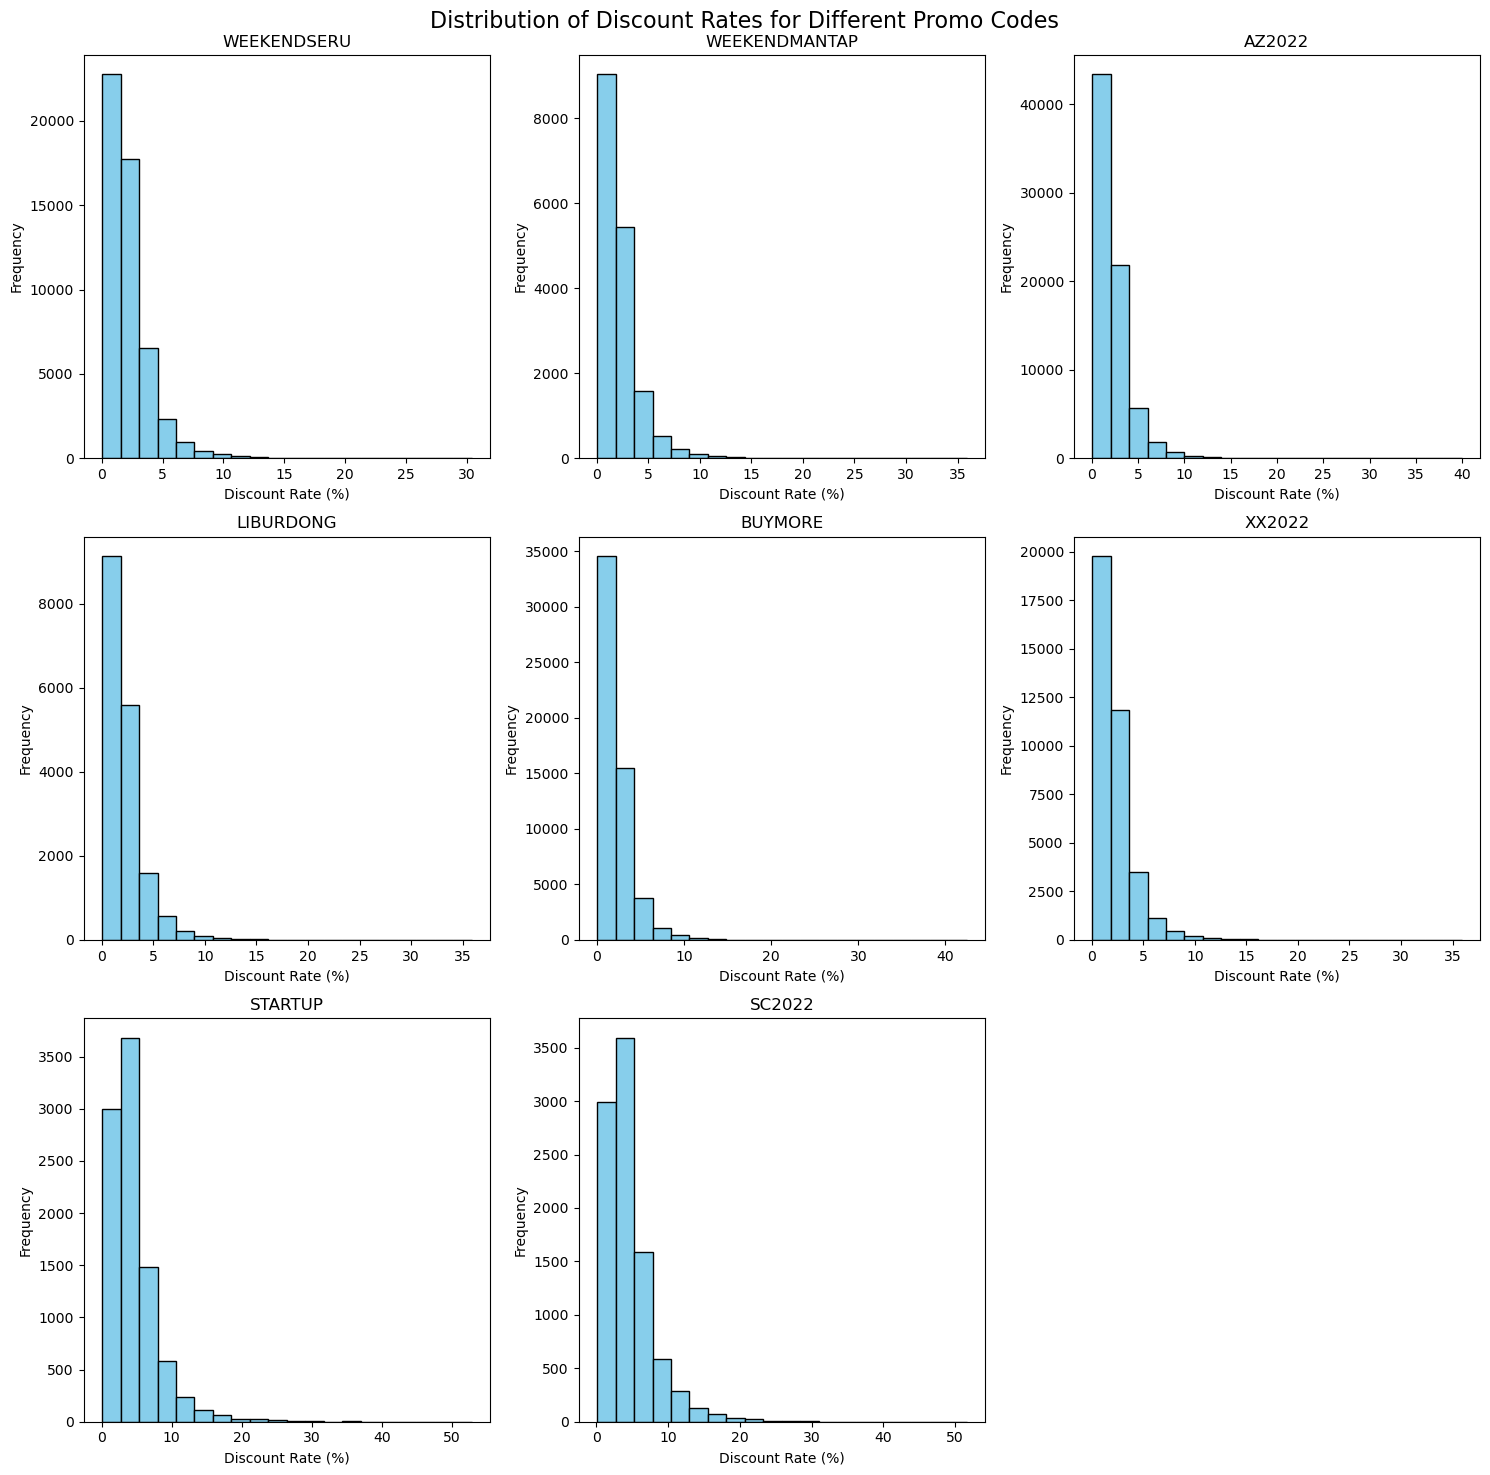

In [32]:
# 전체 프로모션 코드 plot
import matplotlib.pyplot as plt
import numpy as np

promo_codes = ['WEEKENDSERU', 'WEEKENDMANTAP', 'AZ2022', 'LIBURDONG', 'BUYMORE', 'XX2022', 'STARTUP', 'SC2022']

# Create a 3x3 subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.suptitle('Distribution of Discount Rates for Different Promo Codes', fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each promo code and create a histogram
for i, promo_code in enumerate(promo_codes):
    if promo_code in df_discount_true['promo_code'].values:
        df_promo = df_discount_true[df_discount_true['promo_code'] == promo_code]
        ax = axes[i]
        ax.hist(df_promo['discount_rate'], bins=20, color='skyblue', edgecolor='black')
        ax.set_title(promo_code)
        ax.set_xlabel('Discount Rate (%)')
        ax.set_ylabel('Frequency')

# Remove any unused subplots
for i in range(len(promo_codes), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.subplots_adjust(top=0.95)

# Show the plot
plt.show()

In [39]:
import numpy as np
import pandas as pd

# Assuming 'tranfinal_cus.csv' is the name of your CSV file
df_tranfinal_cus = pd.read_csv('tranfinal_cus.csv')


In [44]:
# 데이터 구조 변환, 2022년에 구매를 1번만 한 고객 파악
a=df_tranfinal_cus[(~df_tranfinal_cus.created_at.isnull())&(df_tranfinal_cus.created_at_5=='2022')&(df_tranfinal_cus.payment_status=='Success')].groupby('customer_id').agg({'session_id':['first','count']}).reset_index()
a.columns = [f'{col[0]}_{col[1]}' for col in a.columns]
tmp = a[a.session_id_count==1]
# 다회성고객 추출한 데이터
tmp_session1 = df_tranfinal_cus[(~df_tranfinal_cus.session_id.isin(tmp['session_id_first'].values))&(df_tranfinal_cus.payment_status=='Success')&(df_tranfinal_cus.created_at_5=='2022')]



AttributeError: 'DataFrame' object has no attribute 'created_at_5'